Simple UserReg Model Evaluation

In [19]:
import numpy as np
import pandas as pd
from userreg import UserReg
from userreg import WUserReg

#Classic UserReg model evaluation
# Load train/test splits
R_train = np.load("data/ratings_train.npy")
R_test = np.load("data/ratings_test.npy")

print(f"Train shape: {R_train.shape}, Test shape: {R_test.shape}")

for iter in range (1, 31, 2):
    model = UserReg(k=8, lr=0.01, lambda_reg=0.02, beta_reg=8.0, bias_init="medium_adapted_mean", num_iterations=iter)


    # Fit on training data
    model.fit(R_train)

    # Predict full matrix
    preds = model.predict()

    # Evaluate only on test entries that are not NaN
    mask_test = ~np.isnan(R_test)
    true_values = R_test[mask_test]
    pred_values = preds[mask_test]
    pred_values = np.clip(pred_values, 1, 5)

    # Compute RMSE
    rmse = np.sqrt(np.mean((true_values - pred_values) ** 2))
    print(f"Test RMSE: {rmse:.4f}")


Train shape: (610, 4980), Test shape: (610, 4980)


Training UserReg: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Test RMSE: 0.9934


Training UserReg: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


Test RMSE: 0.9266


Training UserReg: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Test RMSE: 0.9076


Training UserReg: 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]


Test RMSE: 0.8980


Training UserReg:  33%|███▎      | 3/9 [00:01<00:03,  1.92it/s]


KeyboardInterrupt: 

Simple UserReg with pre-ratings-normalization and post-denormalization

In [20]:
import numpy as np
import pandas as pd
from userreg import UserReg
from userreg import WUserReg
from functions.normalization import normalize_ratings, denormalize_predictions

#Classic UserReg model evaluation
# Load train/test splits
R_train = np.load("data/ratings_train.npy")
R_test = np.load("data/ratings_test.npy")

print(f"Train shape: {R_train.shape}, Test shape: {R_test.shape}")

for iter in range (1, 31, 2):
    model = UserReg(k=8, lr=0.01, lambda_reg=0.02, beta_reg=8.0, bias_init="medium_adapted_mean", num_iterations=iter)

    R_train_normalized, stats = normalize_ratings(R_train)

    model.fit(R_train_normalized)
    preds = model.predict()

    denormalized_preds = denormalize_predictions(preds, stats)

    # Evaluate only on test entries that are not NaN
    mask_test = ~np.isnan(R_test)
    true_values = R_test[mask_test]
    pred_values = denormalized_preds[mask_test]
    pred_values = np.clip(pred_values, 0.5, 5)

    """print(R_train_normalized[:5, :5])
    print(preds[:5, :5])
    print(true_values[:10])"""

    # Compute RMSE
    rmse = np.sqrt(np.mean((true_values - pred_values) ** 2))
    print(f"Test RMSE: {rmse:.4f}")


Train shape: (610, 4980), Test shape: (610, 4980)
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.9620
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.9202
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.9053
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8972
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8921
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8887
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8863
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 15/15 [00:07<00:00,  2.14it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8846
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 17/17 [00:07<00:00,  2.15it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8834
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 19/19 [00:08<00:00,  2.17it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8825
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8819
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 23/23 [00:10<00:00,  2.11it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8814
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 25/25 [00:11<00:00,  2.12it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8811
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 27/27 [00:12<00:00,  2.14it/s]



Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8810
Starting global rating normalization on dense matrix...
Global Mean: 3.52, Global Std Dev: 1.03
Normalization complete.


Training UserReg: 100%|██████████| 29/29 [00:13<00:00,  2.16it/s]


Starting global denormalization...
Denormalization complete.
Test RMSE: 0.8809


WUserReg Model Evaluation

In [ ]:
from userreg import WUserReg

# Load train/test splits
R_train = np.load("data/ratings_train.npy")
R_test = np.load("data/ratings_test.npy")

print(f"Train shape: {R_train.shape}, Test shape: {R_test.shape}")

model2 = WUserReg(k=8, lr=0.01, lambda_reg=0.02, beta_reg=8.0, bias_init="medium_adapted_mean", num_iterations=12,
                  alpha1=0, alpha2=0.2, m1=15, m2=25)


# Fit on training data
model2.fit(R_train)

# Predict full matrix
preds2 = model2.predict()


# Evaluate only on test entries that are not NaN
mask_test2 = ~np.isnan(R_test)
true_values2 = R_test[mask_test2]
pred_values2 = preds2[mask_test2]


# Compute RMSE
rmse2 = np.sqrt(np.mean((true_values2 - pred_values2) ** 2))
print(f"Test RMSE: {rmse2:.4f}")


Train shape: (610, 4980), Test shape: (610, 4980)
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.4743


Training UserReg: 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

Test RMSE: 0.9255


Grid search for weights parameters for WUserReg

In [ ]:
#Grid search for weights parameters for WUserReg

results = []
best_rmse = float("inf")
best_params = None
iter = 0 
# Apply ALS matrix factorization
for alpha1 in [0, 0.15, 0.25]:
     for alpha2 in [0, 0.15, 0.25]:
          for m1 in [10,20]:
               for m2 in [16,25]:
                iter += 1
                print(f"({iter}/36)")
                print(f"Applying WANNLS matrix factorization with alpha1={alpha1}, alpha2={alpha2}, m1={m1}, m2={m2}...")
                model2 = WUserReg(k=8, lr=0.01, lambda_reg=0.02, beta_reg=8.0, bias_init="medium_adapted_mean", num_iterations=10,
                  alpha1=alpha1, alpha2=alpha2, m1=m1, m2=m2)


                model2.fit(R_train)

                preds2 = model2.predict()

                mask_test2 = ~np.isnan(R_test)
                true_values2 = R_test[mask_test2]
                pred_values2 = preds2[mask_test2]

                rmse_test2 = np.sqrt(np.mean((true_values2 - pred_values2) ** 2))
                print(f"Test RMSE: {rmse_test2:.4f}")

                results.append(
                        {
                            "alpha": alpha1,
                            "alpha2": alpha2,
                            "m1": m1,
                            "m2": m2,
                            "rmse": rmse_test2,
                        }
                    )
                if rmse_test2 < best_rmse:
                        best_rmse = rmse_test2
                        best_params = {
                            "alpha": alpha1,
                            "alpha2": alpha2,
                            "m1": m1,
                            "m2": m2,
                            "rmse": rmse_test2,
                        }
                        print(f"  *** NEW BEST MODEL ***")
                
results_df = pd.DataFrame(results)
results_df.to_csv("WUserReg_grid_search_results.csv", index=False)
print(f"\nResults saved to 'wannls_grid_search_results.csv'")


print("\nTop 10 models by RMSE:")
print(results_df.nsmallest(10, "rmse"))

(1/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 1.0000


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Test RMSE: 0.8902
  *** NEW BEST MODEL ***
(2/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 1.0000


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Test RMSE: 0.8902
(3/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 1.0000


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


Test RMSE: 0.8902
(4/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 1.0000


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Test RMSE: 0.8902
(5/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.15, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.5948


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Test RMSE: 0.9205
(6/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.15, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.5712


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Test RMSE: 0.9098
(7/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.15, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.5948


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Test RMSE: 0.9205
(8/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.15, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.5712


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Test RMSE: 0.9098
(9/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.25, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.4218


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Test RMSE: 0.9827
(10/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.25, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.3940


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


Test RMSE: 0.9504
(11/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.25, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.4218


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


Test RMSE: 0.9827
(12/36)
Applying WANNLS matrix factorization with alpha1=0, alpha2=0.25, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.3940


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Test RMSE: 0.9504
(13/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.4941


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Test RMSE: 1.0221
(14/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.4941


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


Test RMSE: 1.0221
(15/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.4844


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Test RMSE: 1.0009
(16/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.4844


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


Test RMSE: 1.0009
(17/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.15, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.2929


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


Test RMSE: 0.9909
(18/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.15, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.2815


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


Test RMSE: 0.9937
(19/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.15, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.2873


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


Test RMSE: 0.9752
(20/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.15, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.2761


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


Test RMSE: 0.9768
(21/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.25, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.2073


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


Test RMSE: 1.0053
(22/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.25, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1939


Training UserReg: 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


Test RMSE: 0.9971
(23/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.25, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.2034


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


Test RMSE: 0.9943
(24/36)
Applying WANNLS matrix factorization with alpha1=0.15, alpha2=0.25, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1901


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


Test RMSE: 0.9838
(25/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.3124


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


Test RMSE: 1.2359
(26/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.3124


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


Test RMSE: 1.2359
(27/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.3015


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


Test RMSE: 1.1803
(28/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.3015


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


Test RMSE: 1.1803
(29/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.15, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1849


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


Test RMSE: 1.1689
(30/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.15, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1777


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


Test RMSE: 1.1800
(31/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.15, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1785


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


Test RMSE: 1.1210
(32/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.15, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1716


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


Test RMSE: 1.1303
(33/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.25, m1=10, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1307


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


Test RMSE: 1.1531
(34/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.25, m1=10, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1222


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


Test RMSE: 1.1608
(35/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.25, m1=20, m2=16...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1262


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


Test RMSE: 1.1118
(36/36)
Applying WANNLS matrix factorization with alpha1=0.25, alpha2=0.25, m1=20, m2=25...
Found 31598 total ratings.
Average un-normalized weight (w'_avg): 0.1181


Training UserReg: 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]

Test RMSE: 1.1161

Results saved to 'wannls_grid_search_results.csv'

Top 10 models by RMSE:
    alpha  alpha2  m1  m2      rmse
0     0.0    0.00  10  16  0.890190
1     0.0    0.00  10  25  0.890190
2     0.0    0.00  20  16  0.890190
3     0.0    0.00  20  25  0.890190
5     0.0    0.15  10  25  0.909835
7     0.0    0.15  20  25  0.909835
4     0.0    0.15  10  16  0.920452
6     0.0    0.15  20  16  0.920452
9     0.0    0.25  10  25  0.950413
11    0.0    0.25  20  25  0.950413


In [ ]:


# ---------- Combine Train/Test ----------
R_train = np.load("data/ratings_train.npy")
R_test = np.load("data/ratings_test.npy")


R_combined = np.where(~np.isnan(R_train), R_train, R_test)
print(f"Combined dataset shape: {R_combined.shape} (users × items)")


# ---------- Helper functions ----------
def train_test_split_per_user(R, test_ratio=0.2, seed=42):
    np.random.seed(seed)
    n_users, _ = R.shape
    R_train = np.full_like(R, np.nan)
    R_test = np.full_like(R, np.nan)

    for u in range(n_users):
        items = np.where(~np.isnan(R[u]))[0]
        if len(items) == 0:
            continue
        np.random.shuffle(items)
        split = int(len(items) * (1 - test_ratio))
        R_train[u, items[:split]] = R[u, items[:split]]
        R_test[u, items[split:]] = R[u, items[split:]]
    return R_train, R_test


def generate_kfold_splits(R, k=5, test_ratio=0.5):
    return [train_test_split_random(R, test_ratio=test_ratio, seed=i) for i in range(k)]


# ---------- K-fold evaluation ----------
def evaluate_kfold(R, k=5, test_ratio=0.2,
                   latent_dim=10, lr=0.005, lambda_reg=0.1, beta_reg=8.0, epochs=60):
                   
    rmses, maes = [], []
    splits = generate_kfold_splits(R, k=k, test_ratio=test_ratio)
    print(f"Running {k}-fold cross-validation...")

    for fold, (R_tr, R_te) in enumerate(splits, 1):
        print(f"\nFold {fold}/{k}")
        model = UserReg(k=latent_dim, lr=lr, lambda_reg=lambda_reg,
                        beta_reg=beta_reg, num_iterations=epochs, verbose=False)
        model.fit(R_tr)
        preds = model.predict()

        mask = ~np.isnan(R_te)
        true, pred = R_te[mask], preds[mask]
        rmse = np.sqrt(np.mean((true - pred) ** 2))
        mae = np.mean(np.abs(true - pred))
        rmses.append(rmse)
        maes.append(mae)
        print(f"  RMSE = {rmse:.4f} | MAE = {mae:.4f}")

    print(f"\nAverage RMSE: {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")
    print(f"Average MAE : {np.mean(maes):.4f} ± {np.std(maes):.4f}")
    return rmses, maes


# ---------- Run evaluation ----------
rmses, maes = evaluate_kfold(
    R_combined,
    k=3,
    test_ratio=0.5,
    latent_dim=5,
    lr=0.01,
    lambda_reg=0.05,
    beta_reg=8.0,
    epochs=40
)

Combined dataset shape: (610, 4980) (users × items)
Running 3-fold cross-validation...

Fold 1/3
  RMSE = 0.9109 | MAE = 0.7082

Fold 2/3
  RMSE = 0.9075 | MAE = 0.7064

Fold 3/3
  RMSE = 0.9084 | MAE = 0.7075

Average RMSE: 0.9089 ± 0.0014
Average MAE : 0.7074 ± 0.0007


Combined dataset shape: (610, 4980) (users × items)
Total combinations: 162
Testing k=5, λ=0.05, β=8, lr=0.002, epochs=20
  → RMSE: 1.0761 ± 0.0022
Testing k=5, λ=0.05, β=8, lr=0.002, epochs=30
  → RMSE: 1.0761 ± 0.0022
Testing k=5, λ=0.05, β=8, lr=0.002, epochs=30
  → RMSE: 1.0059 ± 0.0017
Testing k=5, λ=0.05, β=8, lr=0.005, epochs=20
  → RMSE: 1.0059 ± 0.0017
Testing k=5, λ=0.05, β=8, lr=0.005, epochs=20
  → RMSE: 0.9457 ± 0.0018
Testing k=5, λ=0.05, β=8, lr=0.005, epochs=30
  → RMSE: 0.9457 ± 0.0018
Testing k=5, λ=0.05, β=8, lr=0.005, epochs=30
  → RMSE: 0.9178 ± 0.0017
Testing k=5, λ=0.05, β=8, lr=0.01, epochs=20
  → RMSE: 0.9178 ± 0.0017
Testing k=5, λ=0.05, β=8, lr=0.01, epochs=20
  → RMSE: 0.9073 ± 0.0018
Testing k=5, λ=0.05, β=8, lr=0.01, epochs=30
  → RMSE: 0.9073 ± 0.0018
Testing k=5, λ=0.05, β=8, lr=0.01, epochs=30
  → RMSE: 0.8992 ± 0.0017
Testing k=5, λ=0.05, β=12, lr=0.002, epochs=20
  → RMSE: 0.8992 ± 0.0017
Testing k=5, λ=0.05, β=12, lr=0.002, epochs=20
  → RMSE: 1.0761

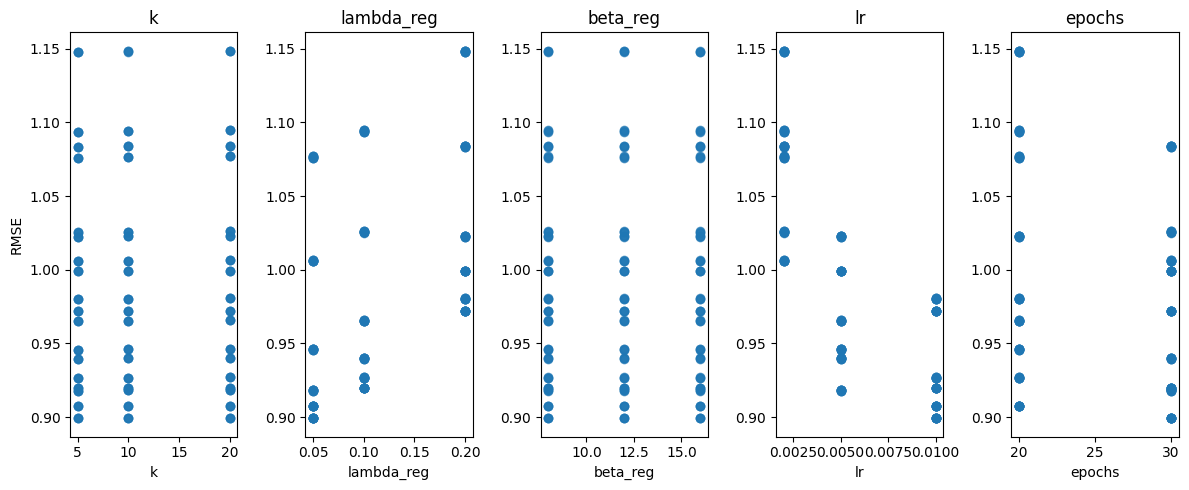

In [43]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from userreg import UserReg


# ---------- Load & Combine ----------
R_train = np.load("data/ratings_train.npy")
R_test = np.load("data/ratings_test.npy")
R = np.where(~np.isnan(R_train), R_train, R_test)
print(f"Combined dataset shape: {R.shape} (users × items)")


# ---------- Helpers ----------
def train_test_split_random(R, test_ratio=0.2, seed=42):
    np.random.seed(seed)
    idx = np.argwhere(~np.isnan(R))
    n_total = len(idx)
    n_test = int(n_total * test_ratio)
    perm = np.random.permutation(n_total)
    test_idx = idx[perm[:n_test]]
    train_idx = idx[perm[n_test:]]
    R_train = np.full_like(R, np.nan)
    R_test = np.full_like(R, np.nan)
    R_train[tuple(train_idx.T)] = R[tuple(train_idx.T)]
    R_test[tuple(test_idx.T)] = R[tuple(test_idx.T)]
    return R_train, R_test


def generate_kfold_splits(R, k=3, test_ratio=0.3):
    return [train_test_split_random(R, test_ratio=test_ratio, seed=i) for i in range(k)]


def evaluate_model(R, k_folds=3, **params):
    splits = generate_kfold_splits(R, k=k_folds, test_ratio=0.3)
    rmses = []
    for (R_tr, R_te) in splits:
        model = UserReg(verbose=False, **params)
        model.fit(R_tr)
        preds = model.predict()
        mask = ~np.isnan(R_te)
        true, pred = R_te[mask], preds[mask]
        rmse = np.sqrt(np.mean((true - pred) ** 2))
        rmses.append(rmse)
    return np.mean(rmses), np.std(rmses)


# ---------- Define hyperparameter grid ----------
param_grid = {
    "k": [5, 10, 20],
    "lambda_reg": [0.05, 0.1, 0.2],
    "beta_reg": [ 8, 12, 16],
    "lr": [0.002, 0.005, 0.01],
    "num_iterations": [20, 30]
}
k_folds = 3  # 3-fold for speed

# Generate all combinations
grid_combos = list(itertools.product(
    param_grid["k"],
    param_grid["lambda_reg"],
    param_grid["beta_reg"],
    param_grid["lr"],
    param_grid["num_iterations"]
))

print(f"Total combinations: {len(grid_combos)}")


# ---------- Run grid search ----------
results = []
for (k_lat, lam, beta, lr, epochs) in grid_combos:
    print(f"Testing k={k_lat}, λ={lam}, β={beta}, lr={lr}, epochs={epochs}")
    mean_rmse, std_rmse = evaluate_model(
        R,
        k_folds=k_folds,
        k=k_lat,
        lr=lr,
        lambda_reg=lam,
        beta_reg=beta,
        num_iterations=epochs
    )
    results.append({
        "k": k_lat,
        "lambda_reg": lam,
        "beta_reg": beta,
        "lr": lr,
        "epochs": epochs,
        "mean_rmse": mean_rmse,
        "std_rmse": std_rmse
    })
    print(f"  → RMSE: {mean_rmse:.4f} ± {std_rmse:.4f}")


# ---------- Display and visualize ----------
df = pd.DataFrame(results).sort_values(by="mean_rmse").reset_index(drop=True)
print("\n===== Hyperparameter Tuning Results =====")
print(df.head(10))

best = df.iloc[0]
print("\n✅ Best configuration:")
print(best)

# --- Visualization (RMSE vs single hyperparameter trends) ---
plt.figure(figsize=(12, 5))
for param in ["k", "lambda_reg", "beta_reg", "lr", "epochs"]:
    plt.subplot(1, 5, ["k", "lambda_reg", "beta_reg", "lr", "epochs"].index(param) + 1)
    plt.scatter(df[param], df["mean_rmse"], alpha=0.7)
    plt.xlabel(param)
    plt.ylabel("RMSE" if param == "k" else "")
    plt.title(param)
plt.tight_layout()
plt.show()


## Grid search with global random split (not per-user)
This section re-runs hyperparameter search using a global, entry-wise random split of observed ratings into train/test, repeated across k folds for robustness.

In [ ]:
import numpy as np
import itertools
import pandas as pd
from userreg import UserReg

# --- Load combined observed ratings ---
R_train = np.load("data/ratings_train.npy")
R_test = np.load("data/ratings_test.npy")
R = np.where(~np.isnan(R_train), R_train, R_test)
print(f"Combined dataset shape: {R.shape} (users × items)")

# --- Global random entry-wise split ---
def train_test_split_random(R, test_ratio=0.2, seed=42):
    rng = np.random.default_rng(seed)
    obs = np.argwhere(~np.isnan(R))
    n_total = len(obs)
    n_test = int(n_total * test_ratio)
    perm = rng.permutation(n_total)
    test_idx = obs[perm[:n_test]]
    train_idx = obs[perm[n_test:]]
    R_train = np.full_like(R, np.nan)
    R_test = np.full_like(R, np.nan)
    R_train[tuple(train_idx.T)] = R[tuple(train_idx.T)]
    R_test[tuple(test_idx.T)] = R[tuple(test_idx.T)]
    return R_train, R_test

# --- K folds built from independent random splits ---
def generate_kfold_splits(R, k=3, test_ratio=0.2):
    return [train_test_split_random(R, test_ratio=test_ratio, seed=i) for i in range(k)]

# --- Evaluation for a single config ---
def evaluate_model(R, k_folds=3, **params):
    splits = generate_kfold_splits(R, k=k_folds, test_ratio=0.2)
    rmses = []
    for (R_tr, R_te) in splits:
        model = UserReg(verbose=False, **params)
        model.fit(R_tr)
        preds = model.predict()
        mask = ~np.isnan(R_te)
        true, pred = R_te[mask], preds[mask]
        rmse = np.sqrt(np.mean((true - pred) ** 2))
        rmses.append(rmse)
    return float(np.mean(rmses)), float(np.std(rmses))

# --- Hyperparameter grid ---
param_grid = {
    "k": [5, 10, 20],
    "lambda_reg": [0.05, 0.1, 0.2],
    "beta_reg": [8, 12, 16],
    "lr": [0.002, 0.005, 0.01],
    "num_iterations": [20, 30],
}

# Cartesian product of grid
grid_combos = list(itertools.product(
    param_grid["k"],
    param_grid["lambda_reg"],
    param_grid["beta_reg"],
    param_grid["lr"],
    param_grid["num_iterations"],
))
print(f"Total combinations: {len(grid_combos)}")

# --- Grid search ---
results = []
for (k_lat, lam, beta, lr, epochs) in grid_combos:
    print(f"Testing k={k_lat}, λ={lam}, β={beta}, lr={lr}, epochs={epochs}")
    mean_rmse, std_rmse = evaluate_model(
        R,
        k_folds=3,
        k=k_lat,
        lr=lr,
        lambda_reg=lam,
        beta_reg=beta,
        num_iterations=epochs,
    )
    results.append({
        "k": k_lat,
        "lambda_reg": lam,
        "beta_reg": beta,
        "lr": lr,
        "epochs": epochs,
        "mean_rmse": mean_rmse,
        "std_rmse": std_rmse,
    })
    print(f"  → RMSE: {mean_rmse:.4f} ± {std_rmse:.4f}")

# --- Display results ---
df = pd.DataFrame(results).sort_values(by="mean_rmse").reset_index(drop=True)
print("\n===== Global random-split Grid Search Results =====")
print(df.head(10))
print("\nBest:")
print(df.iloc[0])